In [1]:
# import all library that i'm used
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Allow the user to entre values
m = float(input('Enter the mass = '))
c = float(input('Enter the damping coefficient = '))
k = float(input('Enter the stiffness = '))
x0 = float(input('Enter the initial dispalcement] = '))
v0 = float(input('Enter the initial velocity = '))
Max_time = float(input('Enter the max time  = '))



In [3]:
# Doing some calculation
 
w = np.sqrt(k / m)
zeta = c / (2 * w * m)  # (1.30)
wd = w * np.sqrt(1 - (zeta**2))  # (1.37)
t = np.linspace(0, Max_time, int(250 * Max_time))

print('The natural frequency is ', w, 'rad/s.')
print('The damping ratio is ', zeta)
print('The damped natural frequency is ', wd)

The natural frequency is  0.06741998624632421 rad/s.
The damping ratio is  16.854996561581054
The damped natural frequency is  nan


C:\Users\Soft Key\AppData\Local\Temp\ipykernel_15144\3931481353.py:5: RuntimeWarning: invalid value encountered in sqrt
  wd = w * np.sqrt(1 - (zeta**2))  # (1.37)


In [4]:
if zeta == 0:
    A = np.sqrt(((x0)**2 + (v0)**2) / w**2)  # (1.38)
    phi = np.arctan2(x0 * w, v0)  # (1.38)
    x = A * np.sin(w * t + phi)  # (1.36)
    print('A =', A)
    print('phi =', phi)
    print ('this system is undamped')
    print(x)

      
elif zeta < 1:
    A = np.sqrt(((v0 + zeta * w * x0)**2 + (x0 * wd)**2) / wd**2)  # (1.38)
    phi = np.arctan2(x0 * wd, v0 + zeta * w * x0)  # (1.38)
    x = A * np.exp(-zeta * w * t) * np.sin(wd * t + phi)  # (1.36)
    print('A =', A)
    print('phi =', phi)
    print ('this system is underdamped')
    print(x)


elif zeta == 1:
    a1 = x0  # (1.46)
    a2 = v0 + w * x0  # (1.46)
    print('a1= ', a1)
    print('a2= ', a2)
    x = (a1 + a2 * t) * np.exp(-w * t)  # (1.45)
    print ('this system is critically damped')
    print(x)

else:
    a1 = (-v0 + (-zeta + np.sqrt(zeta**2 - 1)) * w * x0) / \
        (2 * w * np.sqrt(zeta**2 - 1))  # (1.42)
    a2 = (v0 + (zeta + np.sqrt(zeta**2 - 1)) * w * x0) / \
        (2 * w * np.sqrt(zeta**2 - 1))  # (1.43)
    print('a1= ', a1)
    print('a2= ', a2)
    x = (np.exp(-zeta * w * t)
         * (a1 * np.exp(-w * np.sqrt(zeta**2 - 1) * t)
         + a2 * np.exp(w * np.sqrt(zeta**2 - 1) * t)))  # (1.41)
    print ('this system is overdamped')
    print(x)


a1=  -2.6481880227320014
a2=  6.648188022732002
this system is overdamped
[4.         4.02390167 4.04758665 ... 6.52959221 6.5295399  6.5294876 ]


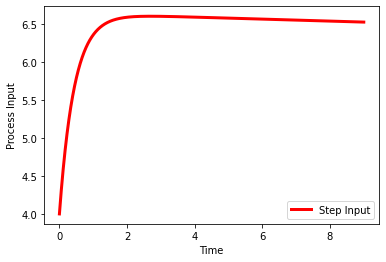

In [5]:
    plt.plot(t,x,'r-',linewidth=3,label='Step Input')
    plt.legend()
    plt.ylabel('Process Input')

    plt.xlabel('Time')
    plt.show()